***
** Algorithmes d'optimisation -- L3 MINT et doubles licences 2017/2018 -- Université Paris-Sud **
***

$\newcommand{\Rsp}{\mathbb{R}}
\newcommand{\nr}[1]{\|#1\|}
\newcommand{\abs}[1]{|#1|}
\newcommand{\eps}{\varepsilon}
\newcommand{\sca}[2]{\langle#1|#2\rangle}
\newcommand{\D}{\mathrm{D}}
\newcommand{\hdots}{\dots}
\newcommand{\cond}{\mathrm{cond}}$


# TP6 : Support vector machines

L'objectif de ce (court) TP est de résoudre le problème d'optimisation 

$$ (P)= \min_{w \in K} \nr{w}^2 \mid K = \{ w \in \Rsp^d\mid \forall j \in I, \sca{w}{x_j}\geq 1 \hbox{ et } \forall j\in J, \sca{w}{x_j} \leq -1 \}, $$

où $I \cup J = \{1,\hdots, k\}$ (l'union étant disjointe) et $(x_j)_{1\leq j\leq \in \Rsp^d}$. On pose

$$ z_j = \begin{cases} 
x_j &\hbox{ si }j\in J\\
-x_j &\hbox{ si } j\in I
\end{cases} $$

et $Z$ la matrice ayant $k$ lignes et $d$ colonnes, dont les $k$ lignes sont les vecteurs $z_1,\hdots,z_k$. On note finalement $e = (1,\hdots,1)\in \Rsp^d$. Le convexe $K$ peut alors être décrit par 

$$K = \{ w \in \Rsp^d \mid Z w + e \leq 0 \},$$

où l'inégalité $Z w+ e\leq 0$ signifie que $\forall i, (Z w+ e)_i \leq 0$.



On rappelle que le lagrangien de ce problème est donné par
$$ 
\ell: (w,\lambda)\in\Rsp^d\times \Rsp^k_+ \mapsto \nr{w}^2 + \sum_{1\leq i\leq k} \sca{\lambda }{ Z w + e} 
$$

**Q1)**
Monter que le problème dual est donné par 

$$
(D) := \max_{\lambda \in\Rsp_+^k} -\frac14 \nr{Z^T\lambda}^2+ \sca{\lambda}{e} =\max_{\lambda \in\Rsp_+^k} G(\lambda)
$$

Pour cela on calculera le minimum de $\ell(\cdot,\lambda)$ pour $\lambda$ fixé et on vérifiera qu'il est atteint pour $w_{\lambda}=-\frac12 ZZ^T \lambda$. 

L'algorithme du gradient projeté pour le problème dual (D) (aussi appelé algorithme d'Uzawa) est donné par 

$$ \begin{cases}
\lambda^{(0)} = 0 \in \Rsp^k \\
w^{(k)} = - \frac12 Z^T \lambda^{(k)} &(\in \arg\min_{x\in\Rsp^d} \ell(x,\lambda)) \\
\gamma^{(k)} = \nabla G(\lambda^{(k)}) &(Z w^{(k)} + e, \hbox{ cf Q2}) \\
\lambda^{(k+1)} = p_{\Rsp_+^k}(\lambda^{(k)} + \tau \gamma^{(k)})\\
\end{cases}
$$

où l'on rappelle que $p_{\Rsp_+^k}(v) = (\max(v_1,0),\hdots,\max(v_k,0))$. L'algorithme est arrêté lorsque $\nr{w^{(k)} - w^{(k+1)}}\leq \eps$.

**Q2)**
Montrer que $\nabla G(\lambda) = e -\frac12 ZZ^T\lambda = Z w_\lambda + e$,

**Q3)**
Écrire l'algorithme en utilisant le $Z$ donné ci-dessous; on l'arrêtera au bout de 2000 itérations. Tester l'algorithme sur les deux jeux de points données ci dessous. \`A l'aide de la fonction lignes_niveau(w), tracez les lignes de niveau de la fonction $x\mapsto \sca{w}{x}$. Tracez la norme de $\lambda^{(k)}$, commentez. 




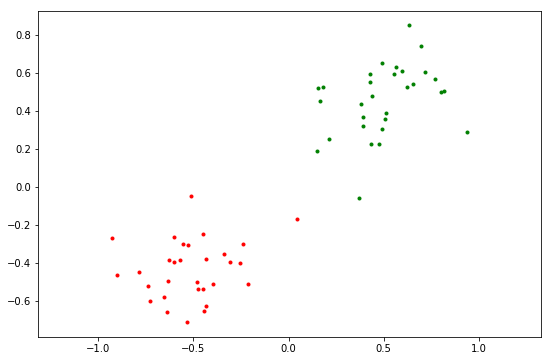

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
# la commande suivante agrandit les figures
plt.rcParams['figure.figsize'] = [9.,6.]

#création des données jeu 1

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
# la commande suivante agrandit les figures
plt.rcParams['figure.figsize'] = [9.,6.]

n = 30
X = np.vstack((np.hstack((-0.5+.2*np.random.randn(n,1), -0.5 + .15*np.random.randn(n,1))),
               np.hstack((0.5+.2*np.random.randn(n,1), 0.5 + .15*np.random.randn(n,1)))))
I = range(0,n)
J = range(n,2*n)
plt.plot(X[I,0],X[I,1],'.r')
plt.plot(X[J,0],X[J,1],'.g')
plt.axis('equal');

Z = X.copy()
Z[J,:] = -Z[J,:]


1.54084
7.20823
7.55202
7.87376
8.11326
8.30585
8.49578
8.68457
8.80921
8.87756
8.92444
8.95716
8.976
8.98371
8.98883
8.99245
8.99503
8.99687
8.99818
8.99912


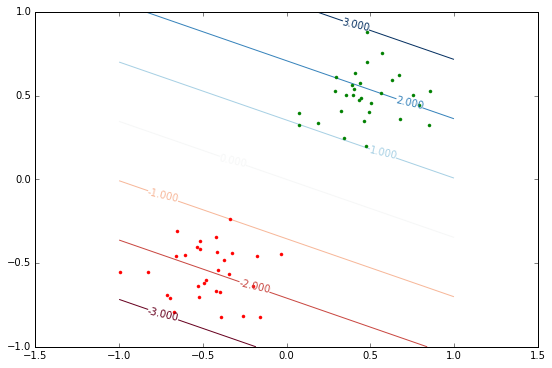

In [3]:
k = 2*n
d = 2
e = np.ones(k)
lbd = np.zeros(k)
tau = .1
for i in range(2000):
    w = -.5*np.dot(Z.T,lbd)
    g = np.dot(Z,w) + e
    lbd = np.maximum(lbd + tau*g,0)
    if i%100==0:
        print('%g' % (-.25*np.linalg.norm(np.dot(Z.T, lbd))**2 + np.dot(lbd,e)))

def lignes_niveau(w):
    u = lambda x,y: x*w[0] + y*w[1]
    Xcontour,Ycontour = np.meshgrid(np.linspace(-1., 1., 100),
                                    np.linspace(-1., 1., 100))
    Zcontour = u(Xcontour,Ycontour)
    p = plt.contour(Xcontour, Ycontour, Zcontour, cmap='RdBu')
    plt.clabel(p, inline=1, fontsize=10)
    
plt.plot(X[I,0],X[I,1],'.r')
plt.plot(X[J,0],X[J,1],'.g')
lignes_niveau(w)
plt.axis('equal');

5.25954
93.9894
159.933
219.558
275.94
331.196
386.266
440.378
493.457
545.734
597.732
649.6
701.407
753.185
804.77
856.216
907.637
959.045
1010.45
1061.85


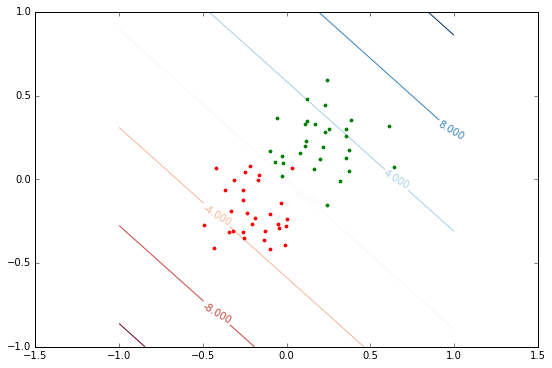

In [5]:
#création des données jeu 2

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
# la commande suivante agrandit les figures
plt.rcParams['figure.figsize'] = [9.,6.]

n = 30
X = np.vstack((np.hstack((-0.2+.2*np.random.randn(n,1), -0.2 + .15*np.random.randn(n,1))),
               np.hstack((0.2+.2*np.random.randn(n,1), 0.2 + .15*np.random.randn(n,1)))))
I = range(0,n)
J = range(n,2*n)
plt.plot(X[I,0],X[I,1],'.r')
plt.plot(X[J,0],X[J,1],'.g')
plt.axis('equal');

Z = X.copy()
Z[J,:] = -Z[J,:]

k = 2*n
d = 2
e = np.ones(k)
lbd = np.zeros(k)
tau = .1
for i in range(2000):
    w = -.5*np.dot(Z.T,lbd)
    g = np.dot(Z,w) + e
    lbd = np.maximum(lbd + tau*g,0)
    if i%100==0:
        print('%g' % (-.25*np.linalg.norm(np.dot(Z.T, lbd))**2 + np.dot(lbd,e)))

plt.plot(X[I,0],X[I,1],'.r')
plt.plot(X[J,0],X[J,1],'.g')
lignes_niveau(w)
plt.axis('equal');

